In [169]:
import numpy as np
from pathlib import Path
import librosa
import librosa.display
import soundfile as sf
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

In [261]:
n_rvb_y_path = "/data/ssp/public/data/dns/dns1/test_set/synthetic/with_reverb/noisy/clnsp1_train_69005_1_snr15_tl-21_fileid_158.wav"
rvb_y_path = "/data/ssp/public/data/dns/dns1/test_set/synthetic/with_reverb/clean/clean_fileid_158.wav"

In [262]:
def extract_mag(y_path, n_fft=512, hop_length=256, win_length=512, sr=16000):
    y, _ = librosa.load(y_path, sr=sr)
    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
    mag, _ = librosa.magphase(D)
    mag = librosa.amplitude_to_db(n_rvb_y_mag, ref=np.max)
    return y, mag

In [263]:
n_rvb_y_mag = extract_mag(n_rvb_y_path)[1]

In [264]:
subband = n_rvb_y_mag[100:131, :]
f, t = subband.shape

/tmp/ipykernel_3064186/2288586131.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


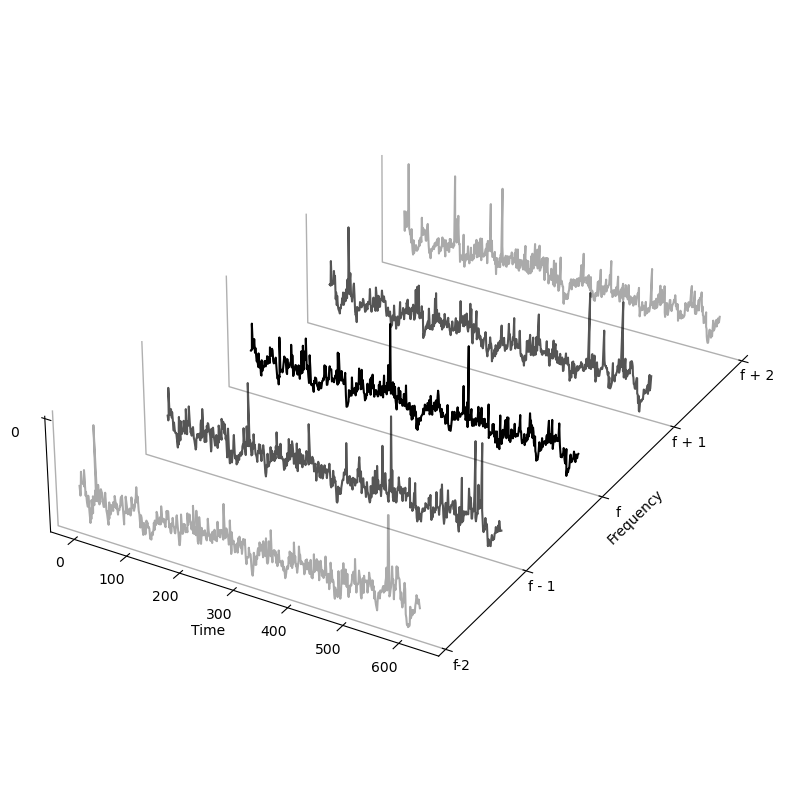

In [265]:
from cProfile import label


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")

num = 6

ax.set_box_aspect(aspect=(10, 15, 3))

x_list = [np.arange(0, t, 1) for _ in range(num)]
y_list = [np.ones(t) * i for i in range(num)]
z_list = subband[0:num, :]
grad = np.linspace(0.0, 1.0, num // 2 + 1)
grad = np.concatenate((grad, grad[::-1][1:]))

for i, (x, y, z) in enumerate(zip(x_list, y_list, z_list)):
    ax.plot(x, y, z, c="black", alpha=grad[i])

ax.set_xlabel("Time")
ax.set_ylabel("Frequency")
ax.set_zlabel("Amplitude (dB)")

ax.xaxis._axinfo["juggled"] = (1, 0, 2)
ax.yaxis._axinfo["juggled"] = (0, 1, 2)
ax.zaxis._axinfo["juggled"] = (1, 2, 0)


ax.xaxis.set_major_locator(plt.MultipleLocator(100))
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.zaxis.set_major_locator(plt.MultipleLocator(20))


labels = ["f - 3", "f-2", "f - 1", "f", "f + 1", "f + 2"]

ax.set_yticklabels(labels)

ax.set_ylim3d(1, 5)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor("w")
ax.yaxis.pane.set_edgecolor("w")
ax.zaxis.pane.set_edgecolor("w")

# ax.grid(False)

ax.xaxis._axinfo["grid"]["linewidth"] = 0.0
ax.yaxis._axinfo["grid"]["linewidth"] = 1.0
ax.zaxis._axinfo["grid"]["linewidth"] = 0.0

plt.savefig("subband_clean.png", dpi=300, bbox_inches="tight")